In [54]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [15, 7]    #sets the ploted size of the histogram


# databaseConnection = 'DRIVER={SQL Server}; SERVER=ServerName; Database=DatbaseName; UID=UserId; PWD=password;'
connection = pyodbc.connect('DRIVER={SQL Server};SERVER=WINDOWS-A6S01I2\SQLEXPRESS;DATABASE=City_of_Scottsdale;Trusted_Connection=yes;')
cursor = connection.cursor()

#SQL Query pulls into Scottsdale arrestees with AZ arrestees already excluded 
ArresteesbyState = '''
 select  
	SUBSTRING(
		[City of Arrestee]
		,charindex(',',[City of Arrestee]) +2
		,2
	) as State_of_Arrestee
	,count(*) as _Count_
from [dbo].[spd_PDArrests$]
where [City of Arrestee] not like '%, AZ %' and --AZ arrestees excluded
	[City of Arrestee] like '%, __ _____' --messy, non-standard records excluded
group by SUBSTRING(
		[City of Arrestee]
		,charindex(',',[City of Arrestee]) +2
		,2
	)
  
  '''
# save the sql query to a pandas dataframe
ArresteesbyState = pd.read_sql(ArresteesbyState, connection)
connection.close()

#Create column 'Percent'
ArresteesbyState['Percent'] = ArresteesbyState._Count_.apply(lambda x: x/ArresteesbyState._Count_.sum()*100)

#format with more decimal places
pd.options.display.float_format = '{:,.4f}'.format

ArresteesbyState['Percent'] = ArresteesbyState.Percent.astype(float)

ArresteesbyState.set_index('State_of_Arrestee', inplace=True)

ArresteesbyState.sort_values(['_Count_'],ascending=[1], inplace=True)
ArresteesbyState

,_Count_,Percent
State_of_Arrestee,,
MN,1,0.4149
KY,1,0.4149
KS,1,0.4149
IN,1,0.4149
ID,1,0.4149
IA,1,0.4149
LA,1,0.4149
NB,1,0.4149
RI,1,0.4149


<Figure size 1440x432 with 0 Axes>

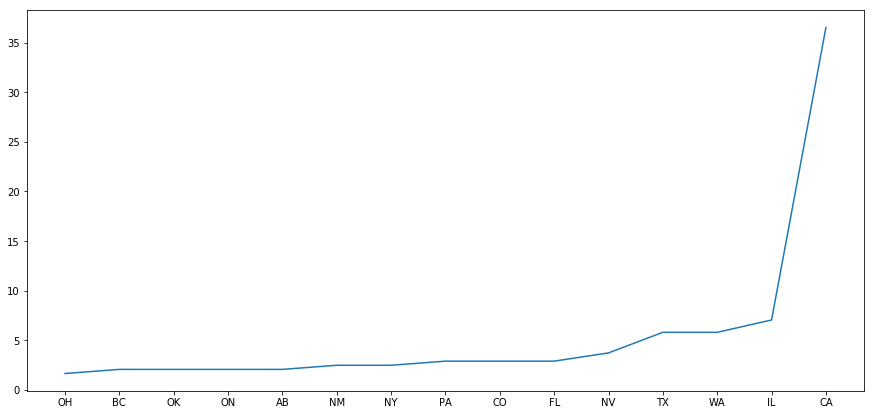

<Figure size 1440x432 with 0 Axes>

In [56]:
sns.lineplot(data=ArresteesbyState.tail(15)['Percent'], sort=False)

plt.figure(figsize=(20, 6))